# Communication Graph

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import os
import glob
from urllib import parse
# from langdetect import detect
# import langid
import requests
import json
import pickle

In [16]:
import community
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
path = "../data/reddit_swiss_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))

dfs = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
dfs = dfs[dfs.num_comments != 0]

path = '../data'

comment_folder = glob.glob(os.path.join(path, "reddit_swiss_comments_2014"))
comments_files = [glob.glob(os.path.join(folder, "part-*")) for folder in comment_folder]
    
#for indx in range(len(comments_files)):
dfc = pd.concat((pd.read_csv(f) for f in comments_files[0]), ignore_index=True)

dfsc = dfs.merge(dfc, how='inner', left_on='name', right_on='link_id')
dfsc = dfsc[dfsc.author_x != dfsc.author_y]

df_swiss = dfsc[['author_x','author_y']]

In [ ]:
path = "../data/reddit_uk_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
dfs = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
dfs = dfs[dfs.num_comments >= 100]

path = '../data'
comment_folder = glob.glob(os.path.join(path, "reddit_uk_comments_2009"))
comments_files = [glob.glob(os.path.join(folder, "part-*")) for folder in comment_folder]
    
#for indx in range(len(comments_files)):
dfc = pd.concat((pd.read_csv(f) for f in comments_files[0]), ignore_index=True)

dfsc = dfs.merge(dfc, how='inner', left_on='name', right_on='link_id')
dfsc = dfsc[dfsc.author_x != dfsc.author_y]

df_uk = dfsc[['author_x','author_y']]

In [59]:
len(dfs)

10793

In [60]:
len(dfc)

2446489

In [62]:
len(df_uk)

791140

In [15]:
path = "../data/reddit_uk_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
dfs = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
dfs = dfs[dfs.num_comments >= 2000]

In [16]:
path = '../data'
comment_folder = glob.glob(os.path.join(path, "reddit_uk_comments_2014"))
comments_files = [glob.glob(os.path.join(folder, "part-*")) for folder in comment_folder]
comments_files_all = [file for sublist in comments_files for file in sublist]

dfc = pd.concat((pd.read_csv(f) for f in comments_files_all), ignore_index=True)
dfc = dfc[dfc['link_id'].isin(dfs['name'])]

In [17]:
dfsc = dfs.merge(dfc, how='inner', left_on='name', right_on='link_id')
dfsc = dfsc[dfsc.author_x != dfsc.author_y]

df_uk = dfsc[['author_x','author_y']]

In [18]:
df = df_uk

In [19]:
len(df)

26747

In [20]:
edges = list(zip(df['author_x'],df['author_y']))
G = nx.Graph()
G.add_edges_from(edges)

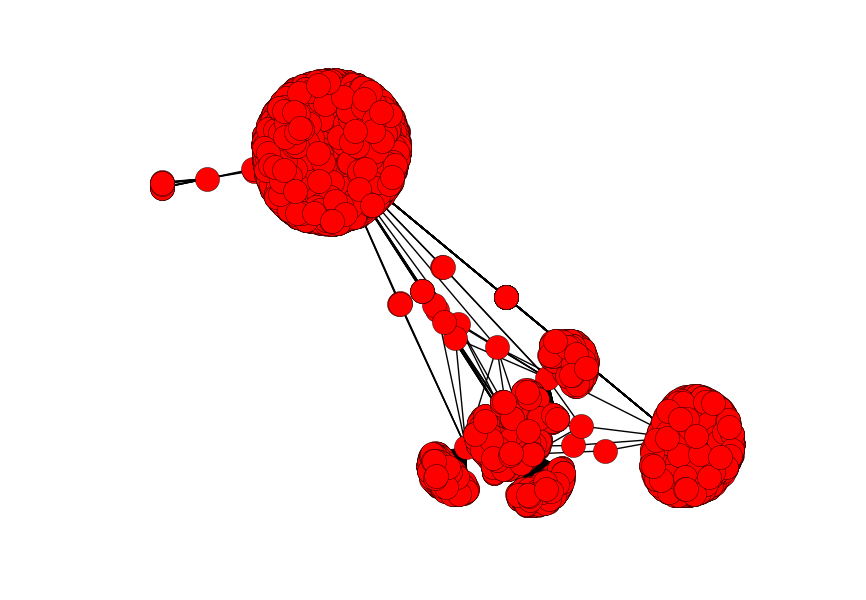

In [21]:
nx.draw(G)

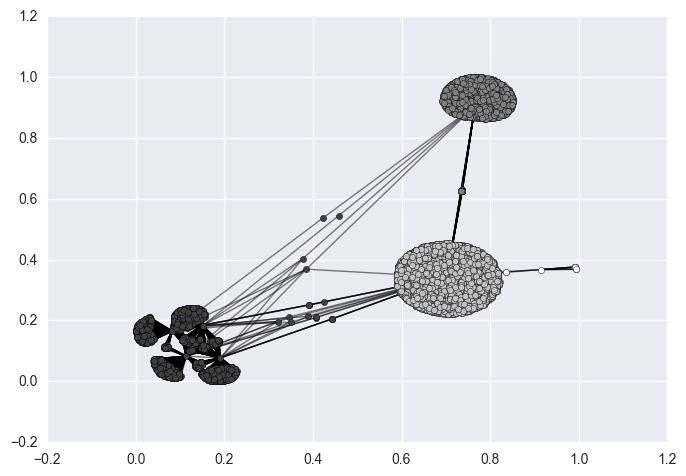

In [22]:
edges = list(zip(df['author_x'],df['author_y']))
G = nx.Graph()
G.add_edges_from(edges)

#compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))

nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

In [24]:
len(df_swiss)

18751

In [25]:
len(df_uk)

26747

In [26]:
df_all = pd.concat([df_swiss, df_uk])

In [27]:
len(df_all)

45498

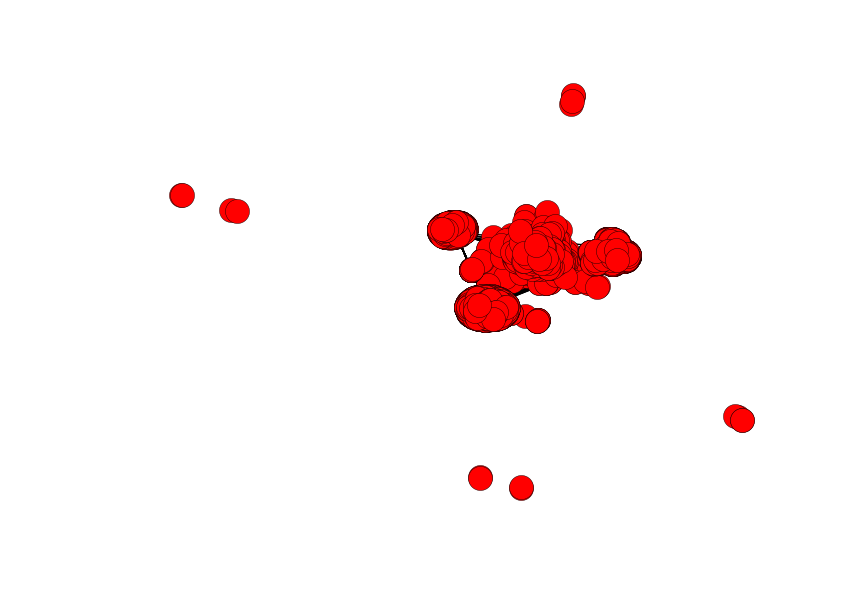

In [28]:
df = df_all[['author_x', 'author_y']]
edges = list(zip(df['author_x'],df['author_y']))
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G)

In [17]:
path = "../data/reddit_uk_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
dfs = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
#dfs = dfs[dfs.num_comments >= 1000]

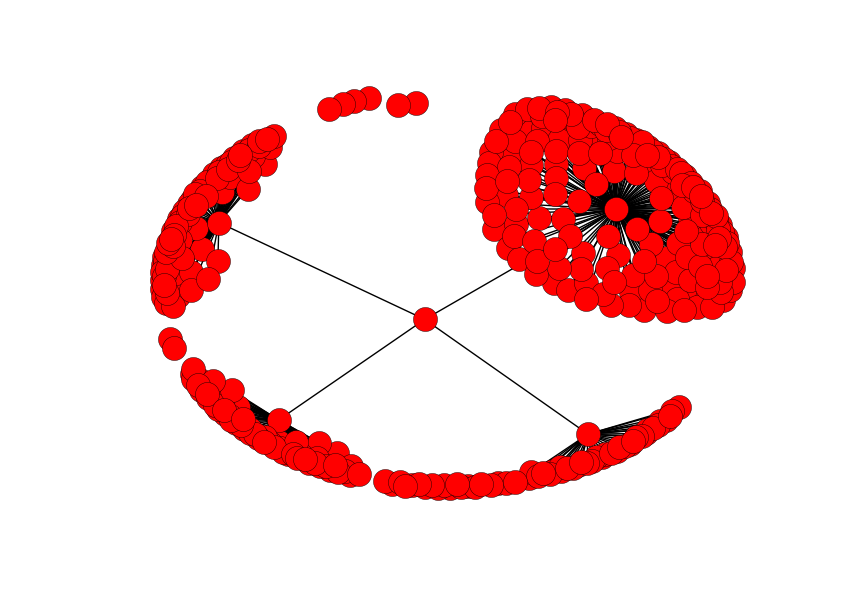

In [26]:
dfs_tmp = dfs[dfs.num_comments >= 500]
df = dfs_tmp[['author', 'subreddit_id']]
edges = list(zip(df['author'],df['subreddit_id']))
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G)

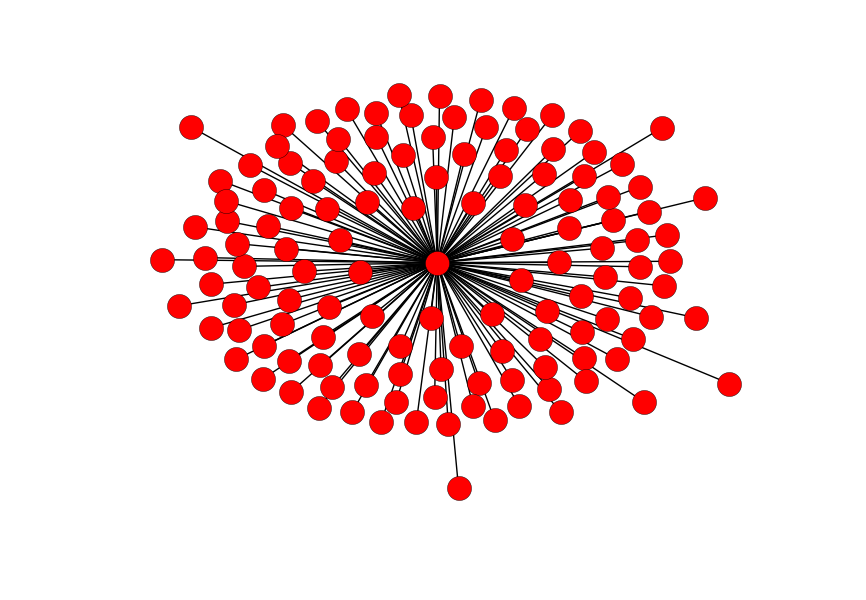

In [14]:
path = "../data/reddit_swiss_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
dfs = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
dfs_tmp = dfs[dfs.num_comments >= 50]
df = dfs_tmp[['author', 'subreddit_id']]
edges = list(zip(df['author'],df['subreddit_id']))
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G)